In [65]:
import os
from pyspark.sql import SparkSession
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns



In [66]:
import findspark
findspark.init()
findspark.find()

'C:\\Program Files\\Spark\\spark-3.5.1-bin-hadoop3'

In [67]:
# Create a SparkSession
spark = SparkSession.builder \
    .appName("My Spark App") \
    .getOrCreate()

# EDA

In [68]:
cleaned_df = spark.read.csv("cleaned_songs.csv", header=True, inferSchema=True)

print(cleaned_df.count())

17536


In [69]:

# for feature in features:
#     display(cleaned_df.select(feature).summary().toPandas())

In [70]:
from pyspark.sql import functions as F
features = ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","duration_ms"]

# transform genre column to string array 
genres = cleaned_df.select("playlist_genre").distinct().select(F.collect_list('playlist_genre')).first()[0]




## Language Distribution 

Number of English songs: 14808


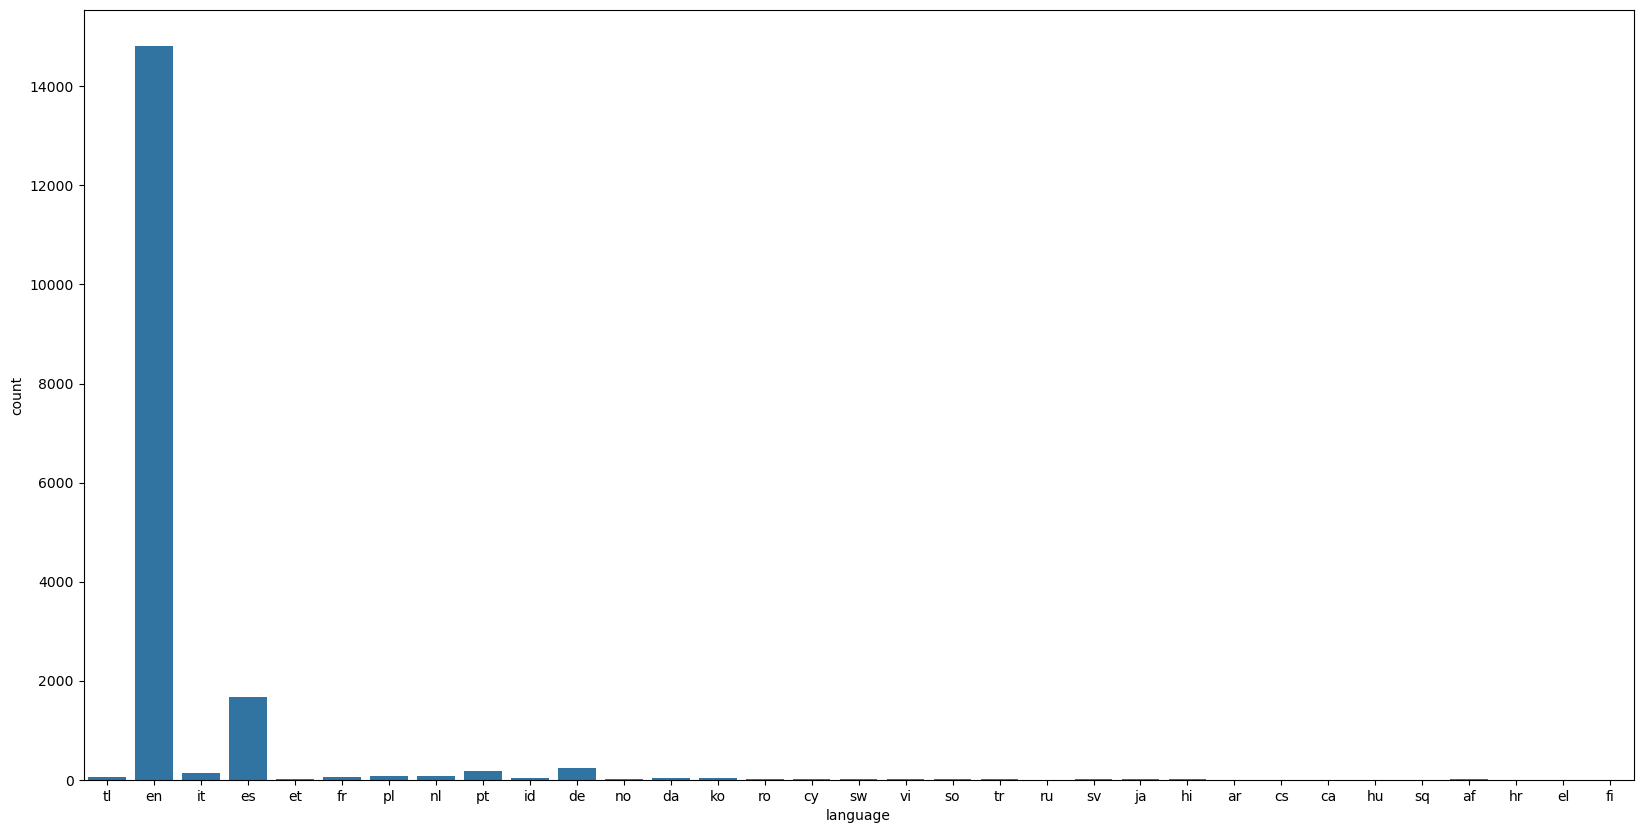

In [71]:
# language distribution
fig,ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='language', data=cleaned_df.toPandas())

# Count the number of engish songs
dfen = cleaned_df.filter(cleaned_df['language'] == 'en')
dfen_count = dfen.count()

print (f"Number of English songs: {dfen_count}")



## Correlation Matrix

<Axes: >

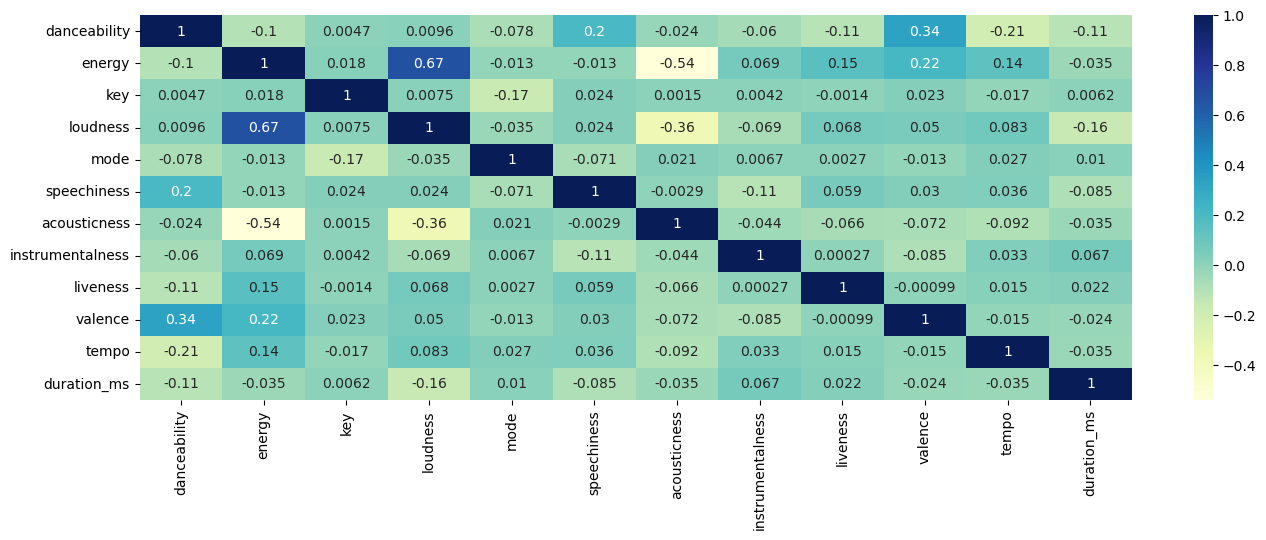

In [72]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

# draw correlation matrix


# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=features, outputCol=vector_col)
df_vector = assembler.transform(cleaned_df).select(vector_col)

# get correlation matrix
corr_matrix_df = Correlation.corr(df_vector, vector_col).collect()[0][0].toArray()

plt.figure(figsize=(16, 5))
sns.heatmap(
    corr_matrix_df,
    xticklabels=features,
    yticklabels=features,
    cmap="YlGnBu",
    annot=True,
)

The only 2 features that have some kind of correlation are <b>loudness</b> and <b>energy</b>

# Relations

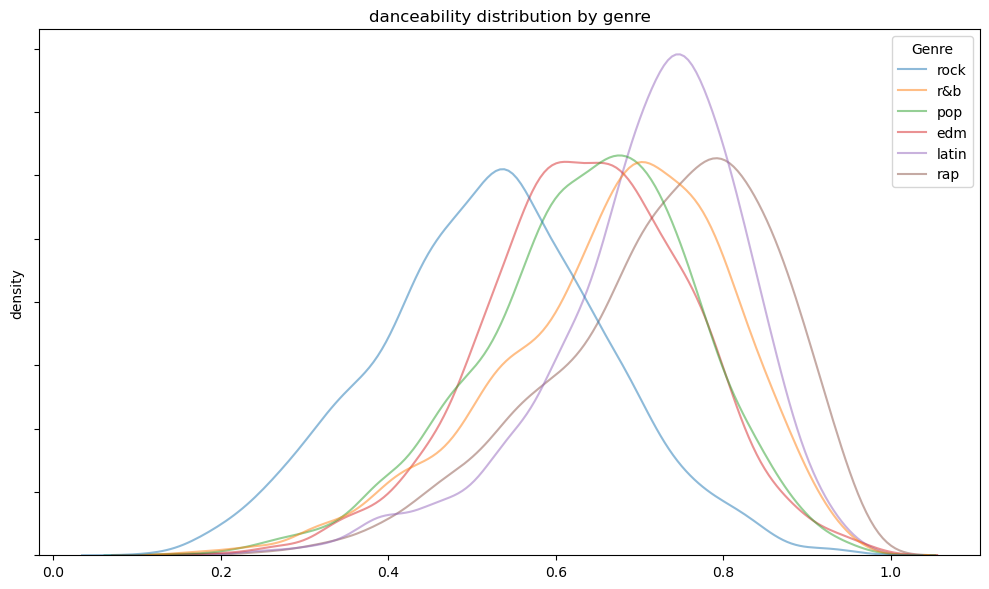

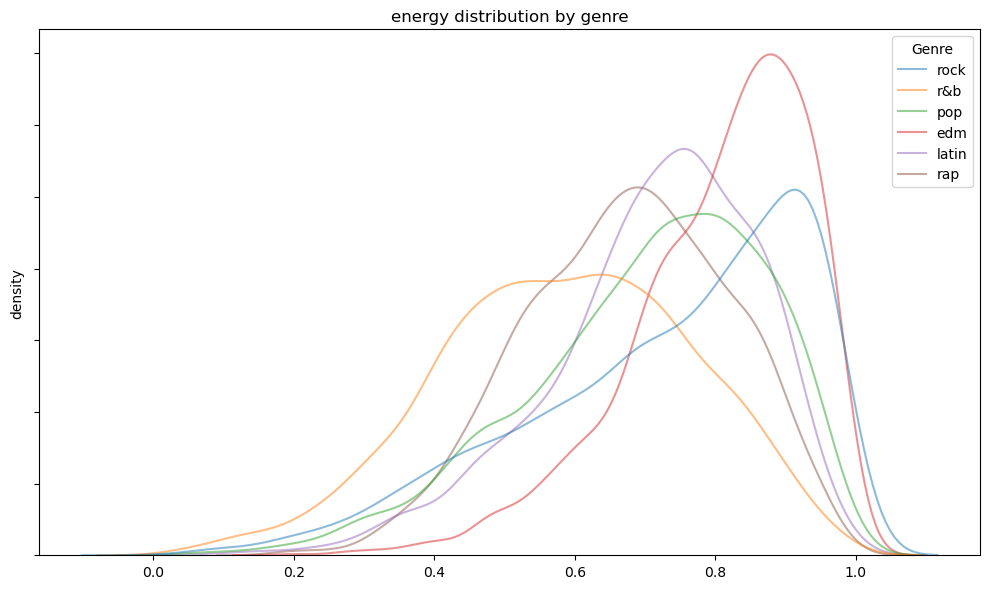

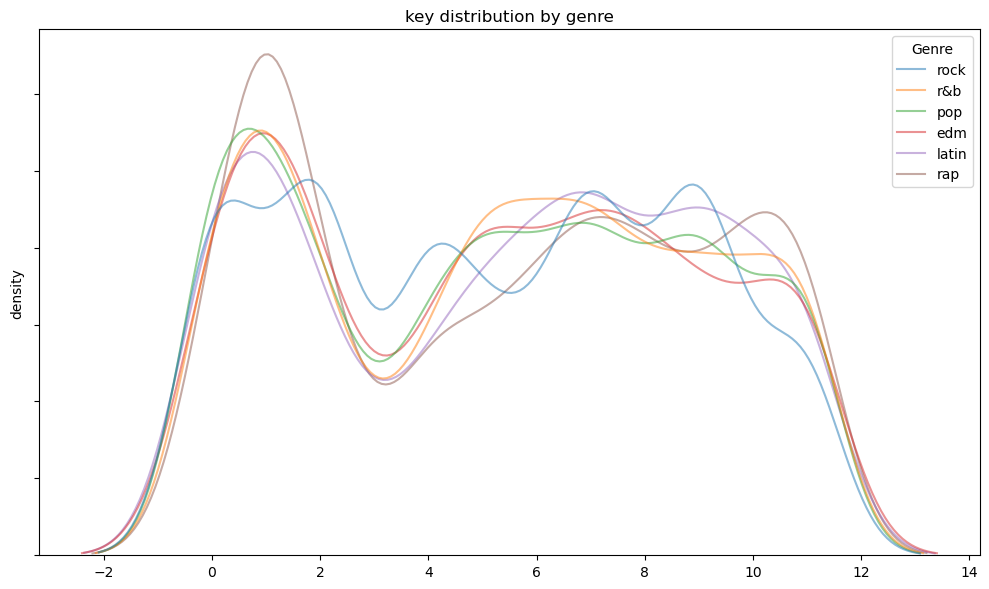

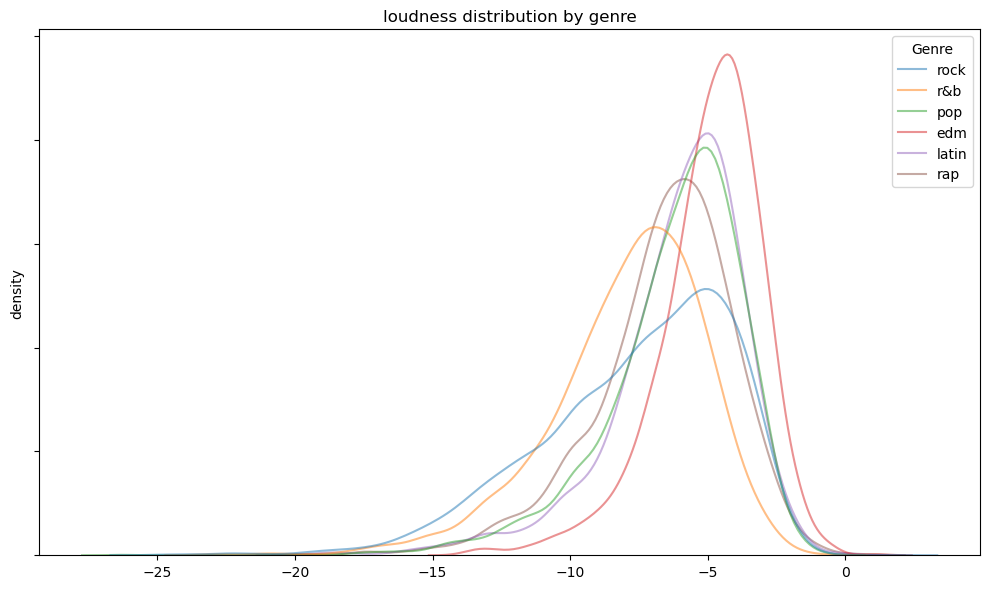

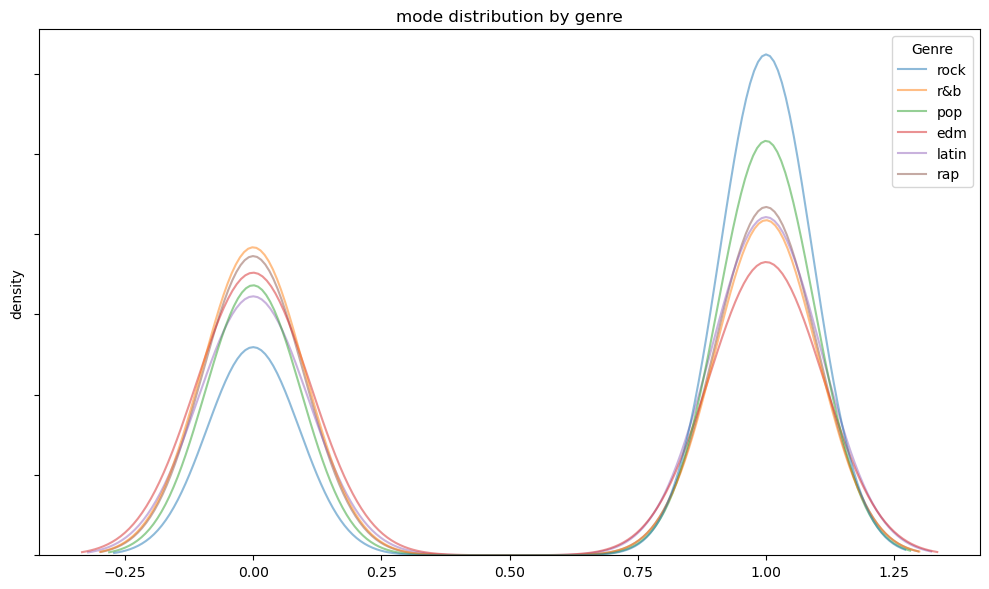

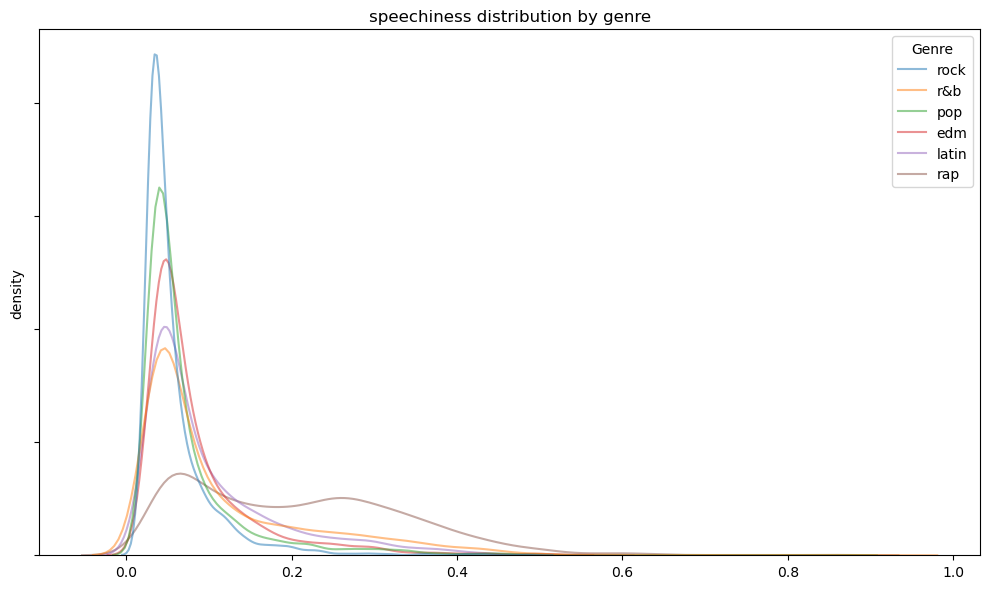

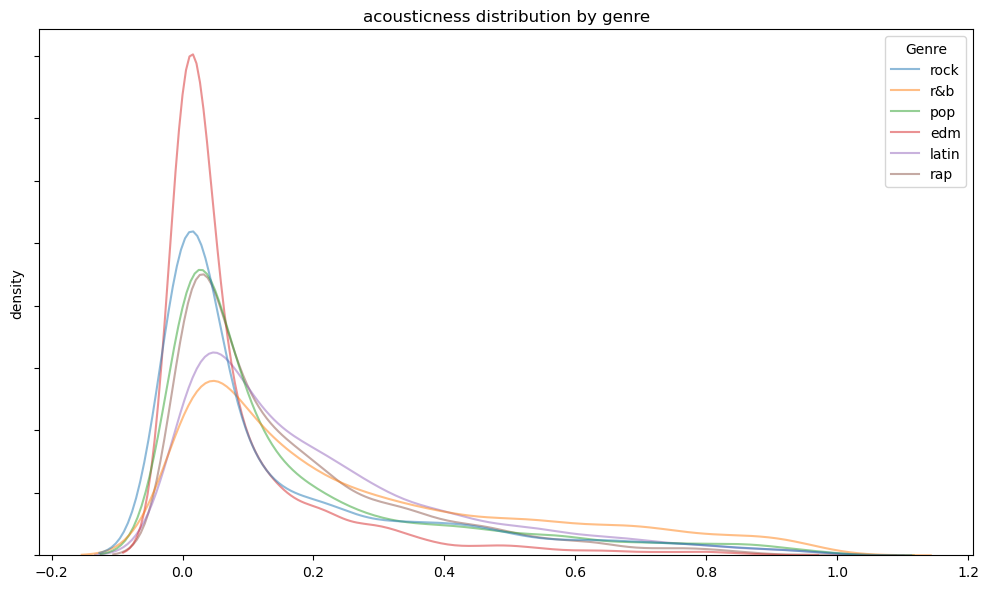

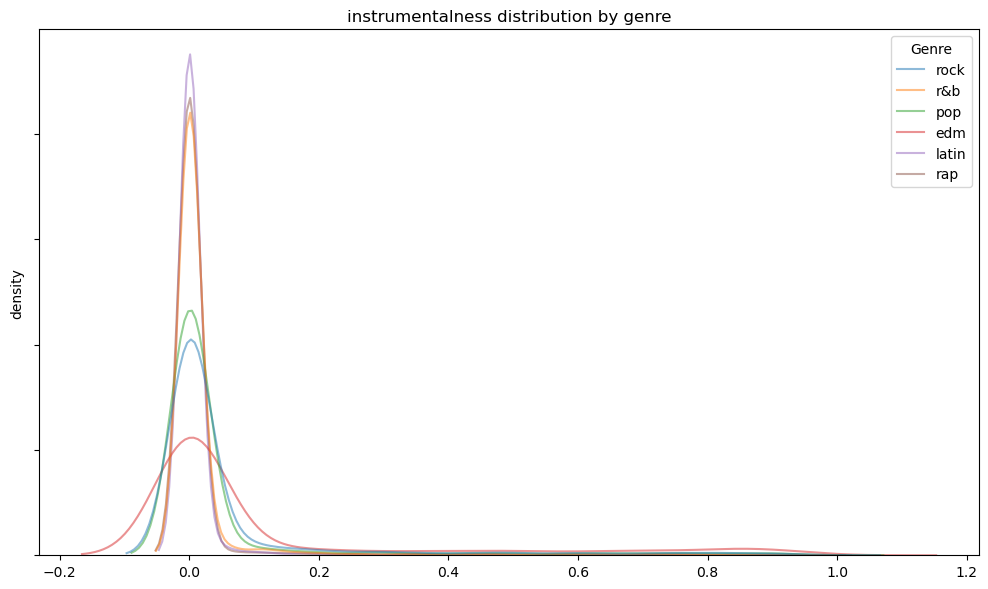

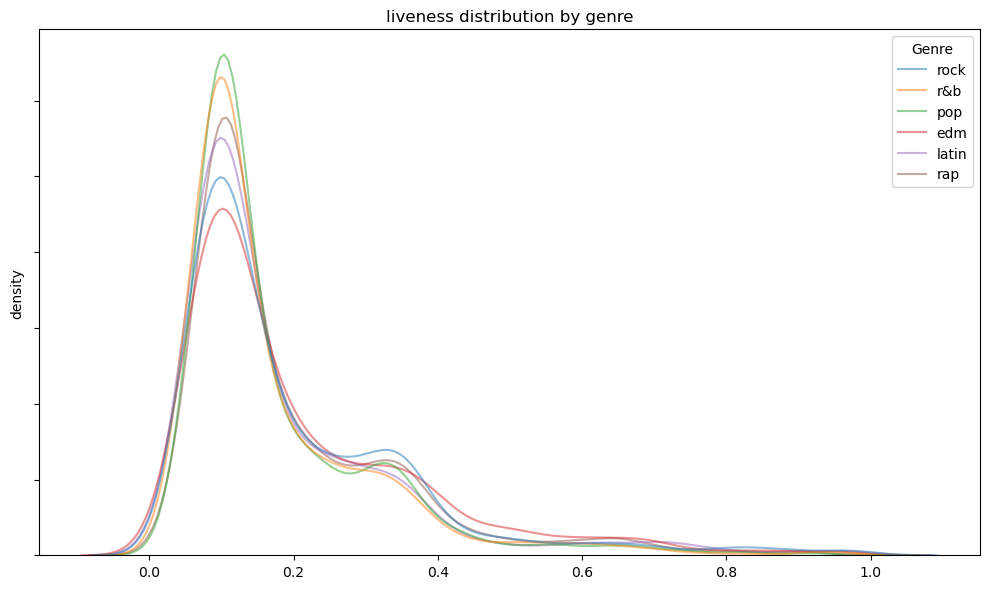

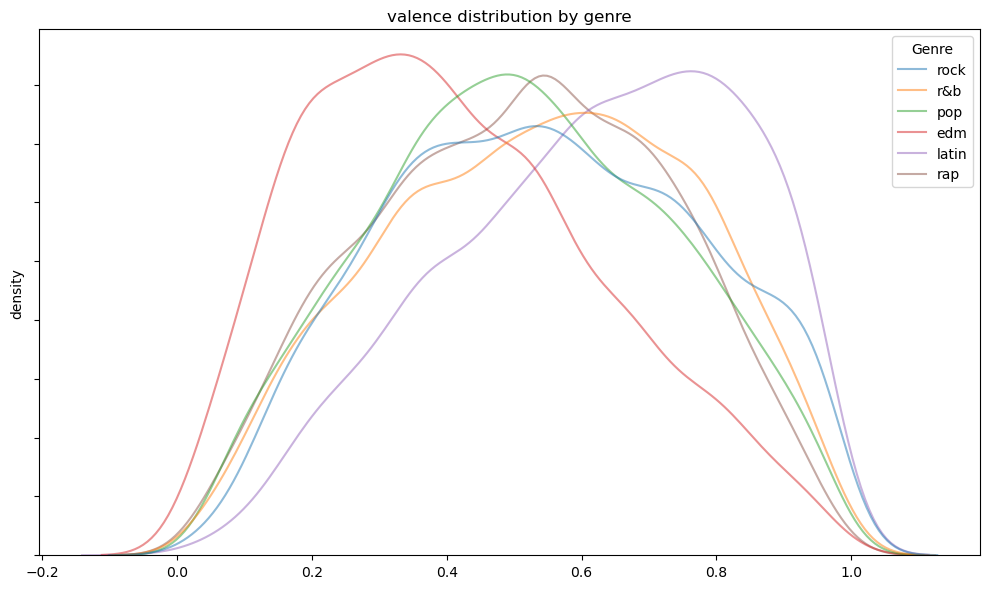

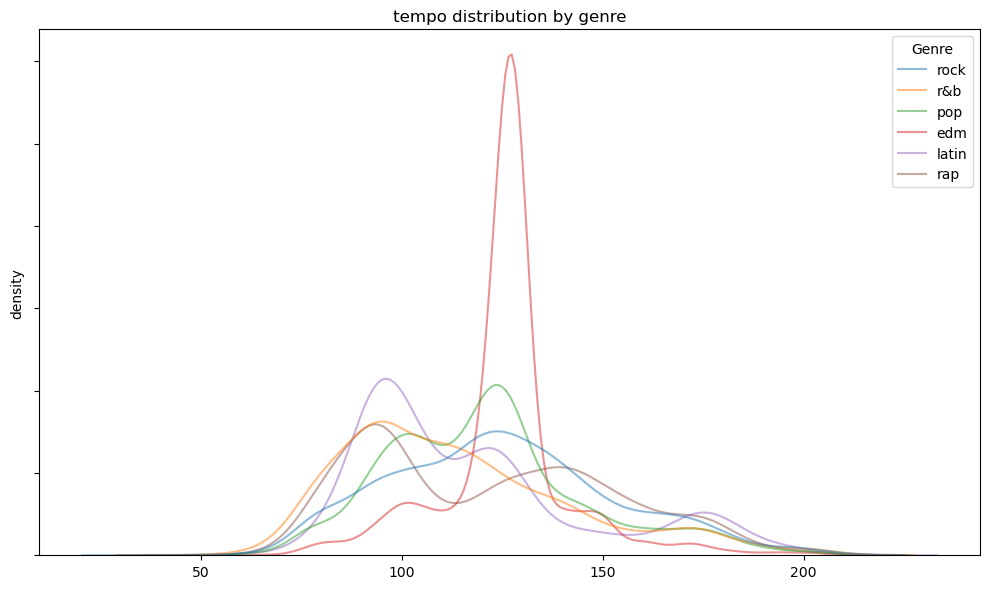

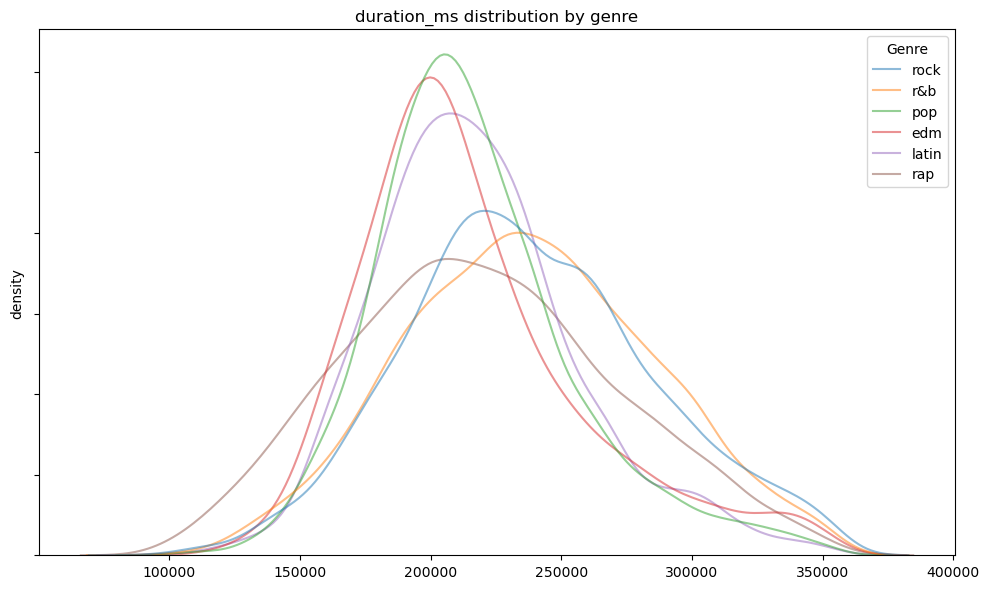

In [80]:
# Selecting columns 'playlist_genre' and feature_names
selected_data = cleaned_df.select(["playlist_genre"] + features)

#rename playlist_genre column to genre
selected_data = selected_data.withColumnRenamed("playlist_genre", "Genre")

# Converting the DataFrame to Pandas for plotting with seaborn
pandas_df = selected_data.toPandas()


for feature in features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=pandas_df, x=feature, hue="Genre", alpha=0.5, common_norm=False)
    plt.title(f"{feature} distribution by genre")
    plt.xlabel("")
    plt.ylabel("density")
    plt.gca().set_yticklabels([])
    plt.tight_layout()
    plt.show()





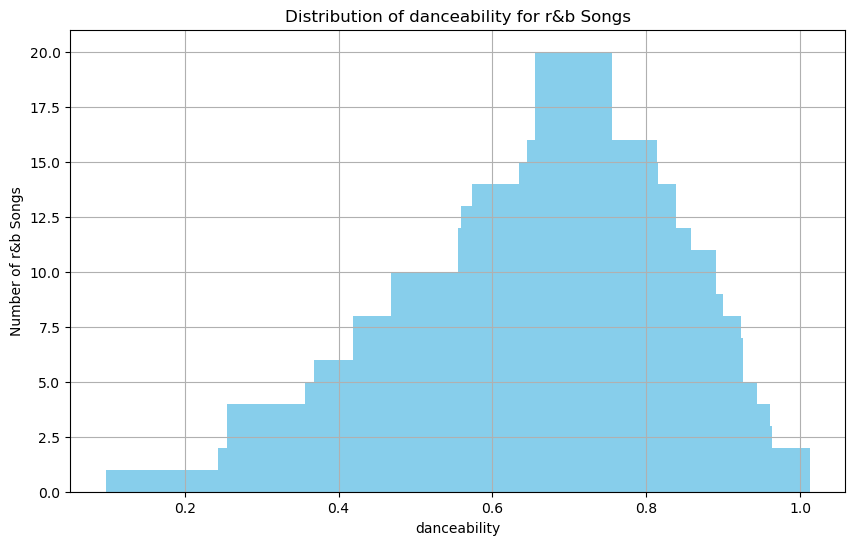

KeyboardInterrupt: 

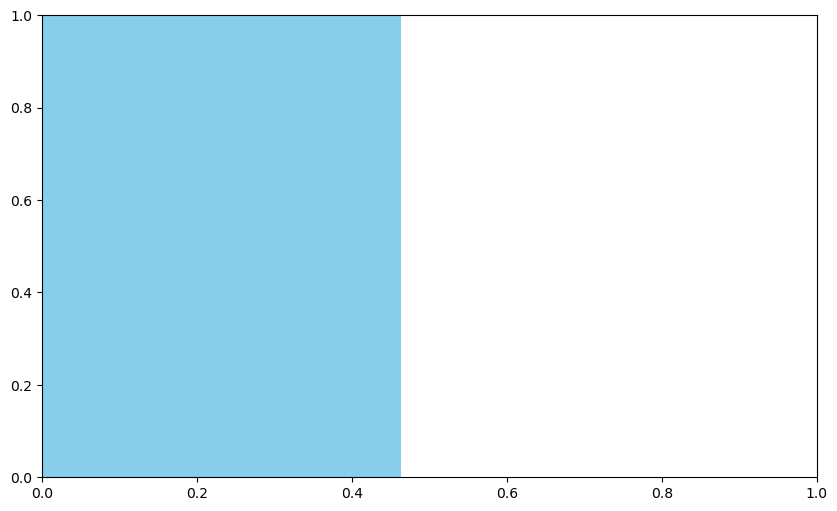

In [7]:
# #draw distribution of each audio feature with each genre as a bar chart

# # Assuming spark is your SparkSession and df is your DataFrame

# for genre in genres:
#     for features in features:
#         # Filter the DataFrame to include only rows belonging to the current genre
#         genre_songs_df = cleaned_df.filter(cleaned_df.playlist_genre == genre)

#         # Group by feature and count the number of songs for each feature
#         feature_counts = genre_songs_df.groupBy(features).count().orderBy(features)

#         # Convert Spark DataFrame to Pandas DataFrame for plotting
#         feature_counts_pd = feature_counts.toPandas()

#         # Plot the graph
#         plt.figure(figsize=(10, 6))
#         plt.bar(feature_counts_pd[features], feature_counts_pd['count'], color='skyblue'  , width=0.1)
#         plt.xlabel(features)
#         plt.ylabel('Number of {} Songs'.format(genre))
#         plt.title('Distribution of {} for {} Songs'.format(features, genre))
#         plt.grid(True)
#         plt.show()
        
        
        